In [1]:
import os
import zipfile
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/content/drive/MyDrive/imagedb_btsd.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()
train_dir = '/content/imagedb_btsd/imagedb'
test_dir = '/content/imagedb_btsd/imagedb_test'

In [2]:
train_images = ImageDataGenerator(rescale=1./255,validation_split = 0.25)
test_img = ImageDataGenerator(rescale=1./255)
train_gen = train_images.flow_from_directory(train_dir,
                                              batch_size = 800,
                                              shuffle = 'true',
                                              class_mode = 'categorical',
                                              color_mode = 'grayscale',
                                              target_size = (100,100),
                                              subset = 'training',
                                              seed = 1
                                              )
validation_generator =  train_images.flow_from_directory(train_dir,
                                                        batch_size=700,
                                                        class_mode='categorical',
                                                        color_mode='grayscale',
                                                         target_size=(100,100),
                                                        subset='validation',
                                                         seed = 1
                                                         ) 
test_gen = test_img.flow_from_directory(test_dir,
                                              batch_size = 1000,
                                              class_mode = 'categorical',
                                              color_mode = 'grayscale',
                                              target_size = (100,100))


Found 2309 images belonging to 34 classes.
Found 747 images belonging to 34 classes.
Found 2149 images belonging to 34 classes.


In [3]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(256, (5, 5), strides=(2, 2), activation='relu', input_shape=(100,100, 1), padding = 'same'),
  tf.keras.layers.Conv2D(256, (4, 4), strides=(2, 2), activation='relu', padding = 'same'),
  tf.keras.layers.Conv2D(128, (3, 3), strides=(1, 1), activation='relu', padding = 'same'),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding = 'same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(rate = 0.3),
  tf.keras.layers.Dense(34, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 256)       6656      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 256)       1048832   
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       295040    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dropout (Dropout)            (None, 18432)             0

In [4]:
callback = []

save_best_callback = tf.keras.callbacks.ModelCheckpoint(f'best_weights.hdf5', save_best_only=True, verbose=1)
callback.append(save_best_callback)

early_stop_callback = tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True, verbose=1)
callback.append(early_stop_callback)

train = model.fit(train_gen,
                steps_per_epoch = train_gen.samples/train_gen.batch_size,
                epochs = 20, 
                validation_data=validation_generator,
                validation_steps=validation_generator.samples/validation_generator.batch_size,
                verbose = 1,
                callbacks = callback)

Epoch 1/20
2/2 [==============================] - 22s 5s/step - loss: 3.5767 - accuracy: 0.0657 - val_loss: 3.1165 - val_accuracy: 0.0763

Epoch 00001: val_loss improved from inf to 3.11646, saving model to best_weights.hdf5
Epoch 2/20
2/2 [==============================] - 4s 1s/step - loss: 3.2390 - accuracy: 0.0844 - val_loss: 3.3445 - val_accuracy: 0.0763

Epoch 00002: val_loss did not improve from 3.11646
Epoch 3/20
2/2 [==============================] - 4s 2s/step - loss: 3.3060 - accuracy: 0.0753 - val_loss: 3.1370 - val_accuracy: 0.0763

Epoch 00003: val_loss did not improve from 3.11646
Epoch 4/20
2/2 [==============================] - 4s 1s/step - loss: 3.1319 - accuracy: 0.1093 - val_loss: 2.9461 - val_accuracy: 0.2905

Epoch 00004: val_loss improved from 3.11646 to 2.94606, saving model to best_weights.hdf5
Epoch 5/20
2/2 [==============================] - 4s 1s/step - loss: 2.9453 - accuracy: 0.2766 - val_loss: 2.6371 - val_accuracy: 0.2704

Epoch 00005: val_loss improved 

3/3 [==============================] - 3s 471ms/step - loss: 0.4326 - accuracy: 0.9037


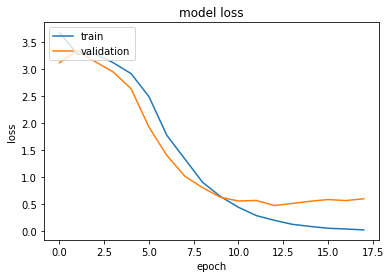

In [5]:
loss, acc = model.evaluate(test_gen)
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [6]:
#Complete CNN
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(256, (4, 4), strides=(2, 2), activation='relu', input_shape=(100,100, 1), padding = 'same'),
  tf.keras.layers.Conv2D(256, (3, 3), strides=(2, 2), activation='relu', padding = 'same'),
  tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), activation='relu', padding = 'same'),
  tf.keras.layers.Conv2D(64,(2,2),strides=(1,1),activation='relu',padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
  tf.keras.layers.Dropout(rate = 0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(rate = 0.25),
  tf.keras.layers.Dense(34, activation='softmax')
])
model1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 50, 50, 256)       4352      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 256)       590080    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 128)       295040    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [7]:
callback1 = []

save_best_callback_1 = tf.keras.callbacks.ModelCheckpoint(f'best_weights_1.hdf5', save_best_only=True, verbose=1)
callback1.append(save_best_callback_1)

early_stop_callback_1 = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, verbose=1)
callback1.append(early_stop_callback_1)
train1 = model1.fit(train_gen,
                steps_per_epoch = train_gen.samples/train_gen.batch_size,
                epochs = 30,
                validation_data=validation_generator,
                validation_steps=validation_generator.samples/validation_generator.batch_size,
                verbose = 1,
                callbacks = callback1)

Epoch 1/30
2/2 [==============================] - 10s 3s/step - loss: 3.4843 - accuracy: 0.0577 - val_loss: 3.2334 - val_accuracy: 0.1285

Epoch 00001: val_loss improved from inf to 3.23343, saving model to best_weights_1.hdf5
Epoch 2/30
2/2 [==============================] - 3s 1s/step - loss: 3.2790 - accuracy: 0.1252 - val_loss: 3.1166 - val_accuracy: 0.1151

Epoch 00002: val_loss improved from 3.23343 to 3.11662, saving model to best_weights_1.hdf5
Epoch 3/30
2/2 [==============================] - 3s 1s/step - loss: 3.1611 - accuracy: 0.1539 - val_loss: 2.9439 - val_accuracy: 0.1874

Epoch 00003: val_loss improved from 3.11662 to 2.94388, saving model to best_weights_1.hdf5
Epoch 4/30
2/2 [==============================] - 3s 1s/step - loss: 3.0028 - accuracy: 0.2003 - val_loss: 2.7423 - val_accuracy: 0.2731

Epoch 00004: val_loss improved from 2.94388 to 2.74230, saving model to best_weights_1.hdf5
Epoch 5/30
2/2 [==============================] - 3s 1s/step - loss: 2.7601 - accur

3/3 [==============================] - 2s 305ms/step - loss: 0.2480 - accuracy: 0.9432


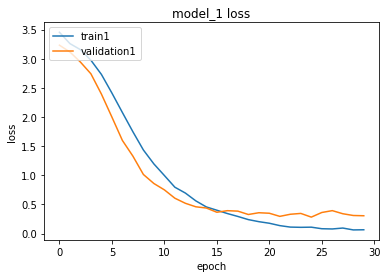

In [8]:
loss1, acc1 = model1.evaluate(test_gen)
plt.plot(train1.history['loss'])
plt.plot(train1.history['val_loss'])
plt.title('model_1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train1','validation1'], loc='upper left')
plt.show()

In [9]:
print("Accuracy for 1st architecture is",round(acc,4)*100,"%,while accuracy for the 2nd is",round(acc1,4)*100,"%")

Accuracy for 1st architecture is 90.36999999999999 %,while accuracy for the 2nd is 94.32000000000001 %
